# Transformées multi-échelles 2D

In [5]:
import numpy as np 
import math as math 
import matplotlib.pyplot as plt

In [6]:
import import_ipynb
#import TP2_ASSANI_TIA

### Transformation de Haar multi-échelle

In [388]:
######## Transformée directe de Haar 1D ########
def haarl_1d_directe(n,u):
    v = np.zeros(n,float)
    v = np.copy(u)
    v = v.astype(float)
    
    w = np.zeros(n,float)
    w = w.astype(float)
    
    m = n
    
    #while m>1: 
    for i in range (int(m/2)):
        w[i]=(v[2*i]+v[2*i+1])/2
        w[i+int(m/2)]= (v[2*i]-v[2*i+1])/2

    for i in range (m):
        v[i]=w[i]

    #m=int(m/2)
         
        
        
    return v 

In [8]:
######## Transformée Directe de Haar 2D ########

##supposons qu'on a une matrice de taille n*n

def haar_2d_directe(n,u):
    v = np.zeros((n,n))
    v = np.copy(u)
    v = v.astype(float)
    #v.shape
    w = np.zeros((n,n))
    w = w.astype(float)
    #w.shape
    
    m = n
    
    while m>1:
    
    #Traitement par ligne
        for i in range (m):
            w[i,:] = haarl_1d_directe(m,v[i,:])
                
        v = np.copy(w)   
            
        #Traitement par colonne
        for i in range (m):
            w[:,i] = haarl_1d_directe(m,v[:,i])
            #print(i)
            #print(w[i,:])
            
        v = np.copy(w)
        #print(m)
        #print(v)
        
        m=int(m/2)
        #v=[float(i) for i in v]
    return v   

In [9]:
haarl_1d_directe(8,[1,2,3,4,5,6,7,8])

array([ 1.5,  3.5,  5.5,  7.5, -0.5, -0.5, -0.5, -0.5])

In [10]:
l=np.array([[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])
print(haar_2d_directe(8,l))

[[ 4.5 -2.  -1.  -1.  -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.  -1.  -1.  -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]


In [11]:
x=[[100,50,60,150],[20,60,40,30],[50,90,70,82],[74,66,90,58]]
print(haar_2d_directe(4,x))

[[ 68.125  -4.375   2.5   -20.   ]
 [ -4.375  -1.875  -8.      5.   ]
 [ 17.5    35.     22.5   -25.   ]
 [  0.      1.    -12.    -11.   ]]


In [122]:
print(type(x))

<class 'list'>


In [246]:
######## Transformée Inverse de Haar 1D ########

def haar_1d_inverse(n,v): 
    #u = np.zeros(n,float)
    u = np.copy(v)
    u = u.astype(float)
    
    w = np.zeros(n,float)
    w = w.astype(float)
    
    m = n
    #m=2
    #while n >= m:
    for i in range (int(m/2)):
        w[2*i]=u[i]+u[i+int(m/2)]
        w[2*i+1]= u[i]-u[i+int(m/2)]
    for i in range (0,m):
        u[i]=w[i]
    #m *= 2

        
    return u

In [215]:
haar_1d_inverse(8,[2.75, -1.25, 0.5, 0.0, 0.0, -1.0, -1.0, 0.0])

array([2., 2., 0., 2., 3., 5., 4., 4.])

In [216]:
haar_1d_inverse(8,[4.5,-2,-1,-1,-0.5,-0.5,-0.5,-0.5])

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [400]:
######## Transformée Inverse 2D ########

##supposons qu'on a une matrice de taille n*n
def haar_2d_inverse(n,u):
    v = np.zeros((n,n),float)
    v = np.copy(u)
    #v = v.astype(float)
    
    w = np.zeros((n,n))
    w = w.astype(float)
    
    
    m = 2
    
    while n >= m:
    
        #Traitement par colonne
        for i in range (0,m):
            w[:,i] = haar_1d_inverse(m,v[:,i])
                
        v = np.copy(w)   
        #print(m)
        #print(v)
        
        #Traitement par ligne
        for i in range (0,m):
            w[i,:] = haar_1d_inverse(m,v[i,:])
            
        v = np.copy(w)
        #print(m)
        #print(v)
        
        m = 2*m
        
    return v   

In [254]:
l=np.array([[4.5,-2,-1,-1,-0.5,-0.5,-0.5,-0.5],[0,0,-1,-1,-0.5,-0.5,-0.5,-0.5],[0,0,0,0,-0.5,-0.5,-0.5,-0.5],[0,0,0,0,-0.5,-0.5,-0.5,-0.5],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
print(haar_2d_inverse(8,l))

2
[[2.5 6.5 0.  0.  0.  0.  0.  0. ]
 [2.5 6.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]
4
[[2.5 2.5 6.5 6.5 0.  0.  0.  0. ]
 [2.5 2.5 6.5 6.5 0.  0.  0.  0. ]
 [2.5 2.5 6.5 6.5 0.  0.  0.  0. ]
 [2.5 2.5 6.5 6.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]
8
[[2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]]
[[2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2.5 2.5 6.5 6.5 6.5 6.5]
 [2.5 2.5 2

In [143]:
##Vérification de x=inverse(directe(x))
size=8
img=np.array([[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])


result = all(map(lambda x, y: (x == y).all(), img, haar_2d_inverse(size,haar_2d_directe(size,img))))
if result:
    print("C'est vérifié pour la Transformée de Haar 2D")
else:
    print("Ce n'est pas vérifié pour la Transformée de Haar 2D")

Ce n'est pas vérifié pour la Transformée de Haar 2D


### Transformation quadratique multi-échelle

In [417]:
######## Transformée Directe 1D ########

def quad_1d_directfct(n,u):
    ##v = np.zeros(n)
    v = np.copy(u)
    v = v.astype(float)
    w = np.copy(u)
    w = w.astype(float)
    vp = np.zeros(n,float)
    vp = vp.astype(float)
    m = n            
      
    for i in range (0,int(m/2)):
        ##Les valeurs moyennes
        w[i]=(v[2*i]+v[2*i+1])/2
        ##Valeurs des erreurs aux bords
        w[i+int(m/2)]= (v[2*i]-v[2*i+1])/2
            
    for i in range (1,int(m/2)-1):
        ##les valeurs prédites
        vp[2*i]=w[i]-(1/8)*(w[i-1]-w[i+1])          
        ##l'erreur
        w[i+int(m/2)]= v[2*i]-vp[2*i]   
            
    for i in range (m):
        v[i]=w[i]
       
    #m=int(m/2)
    ##Pour garantir le fait d'avoir des valeurs sous format float
    #v=[float(i) for i in v]
        
    return v 

In [418]:
######## Transformée Directe 2D ########

##supposons qu'on a une matrice de taille n*n

def quad_2d_directe(n,u):
    v = np.zeros((n,n))
    v = np.copy(u)
    v = v.astype(float)
    #v.shape
    w = np.zeros((n,n))
    w = w.astype(float)
    #w.shape
    
    m = n
    
    while m>1:
    
    #Traitement par ligne
        for i in range (m):
            w[i,:] = quad_1d_directfct(m,v[i,:])
                
        v = np.copy(w)   
            
        #Traitement par colonne
        for i in range (m):
            w[:,i] = quad_1d_directfct(m,v[:,i])
            #print(i)
            #print(w[i,:])
            
        v = np.copy(w)
        #print(m)
        #print(v)
        
        m=int(m/2)
        #v=[float(i) for i in v]
    return v   

In [419]:
l=np.array([[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])
print(quad_2d_directe(8,l))

[[ 4.5 -2.  -1.  -1.  -0.5 -1.  -1.  -0.5]
 [ 0.   0.  -1.  -1.  -0.5 -1.  -1.  -0.5]
 [ 0.   0.   0.   0.  -0.5 -1.  -1.  -0.5]
 [ 0.   0.   0.   0.  -0.5 -1.  -1.  -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]


In [441]:
######## Transformée Inverse 1D ########

def quad_inversefct(n,u):
    v = np.zeros(n,float)
    v = np.copy(u)
    v = v.astype(float)
    
    w = np.zeros(n,float)
    w = w.astype(float)
    
    vp = np.zeros(n,float)
    vp = vp.astype(float)
    
    
    m = n // 2
    
    #while n > m:
        
    ##les valeurs aux bords
    ## k=0
    w[0]=v[0]+v[m]
    w[1]=2*v[0]-w[0]
    ## k=m-1
    w[2*m-2]=v[m-1]+v[2*m-1]
    w[2*m-1]=2*v[m-1]-w[2*m-2]

    for i in range (1,m-1):
        ##les valeurs prédites
        vp[2*i]=v[i]-(1/8)*(v[i-1]-v[i+1])
        ##on ajoute l'erreur
        w[2*i]=vp[2*i]+v[i+m]
        w[2*i+1]= 2*v[i]-w[2*i]
        ##w[2*i+1]= vp[2*i]-w[i+m]

    for i in range (2*m):
        v[i]=w[i]

    #m *= 2
        
    return v


In [452]:
##Transformée Quadratique Inverse 2D

##supposons qu'on a une matrice de taille n*n

def quad_2d_inverse(n,u):
    v = np.zeros((n,n))
    v = np.copy(u)
    v = v.astype(float)
    
    w = np.zeros((n,n))
    w = w.astype(float)
    
    
    m = 2
    
    while m <= n:
    
     #Traitement par colonne
        for i in range (m):
            w[:,i] = quad_inversefct(m,v[:,i])
                
        v = np.copy(w)   
            
        #Traitement par ligne
        for i in range (m):
            w[i,:] = quad_inversefct(m,v[i,:])
             
        v = np.copy(w)
        #print(m)
        #print(v)
        
        m = 2*m
        
    return v 

In [453]:
##Vérification de x=inverse(directe(x))
size=8
img=np.array([[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])


result = all(map(lambda x, y: (x == y).all(), img, quad_2d_inverse(size,quad_2d_directe(size,img))))
if result:
    print("C'est vérifié pour la Transformée Quadratique 2D")
else:
    print("Ce n'est pas vérifié pour la Transformée Quadratique 2D")

Ce n'est pas vérifié pour la Transformée Quadratique 2D


##### Transforméé quadratique ENO 

In [281]:
######## Transformée Directe 1D ########

def quad_1d_eno_directe(n,u):
    v = np.zeros(n,float)
    v = np.copy(u)
    v = v.astype(float)
    
    w = np.zeros(n,float)
    w = w.astype(float)
    
    vp = np.zeros(n,float)
    vp = vp.astype(float)
    
    m = n
    
    #while m>1: 
    ##Calcul des valeurs moyennes
    for i in range (int(m/2)):
        w[i]=(v[2*i]+v[2*i+1])/2

    ##Calcul des valeurs aux bords

    #i=0
    w[int(m/2)]= (v[0]-v[1])/2
    #i=1
    #w[1+int(m/2)]= (v[2]-v[3])/2

    #i=int(m/2)-2
    w[m-2]= (v[2*(int(m/2)-2)]-v[2*int(m/2)-3])/2
    #i=int(m/2)-1
    w[m-1]= (v[2*(int(m/2)-1)]-v[2*int(m/2)-1])/2
    
    ##Calcul des valeurs prédites vp
    ##Calcul des différences finies
    for i in range (2,int(m/2)-2):  
        c = abs(w[i-1]-w[i])+abs(w[i]-w[i+1])
        g = abs(w[i-2]-w[i-1])+abs(w[i]-w[i-1])
        d = abs(w[i+2]-w[i+1])+abs(w[i]-w[i+1])
        m = min(c,d,g)
        if(c == d == g):
            m = c
            vp[2*i] = w[i]-(1/8)*(w[i-1]-w[i+1])
        else: 
            if(m == c):
                vp[2*i] = w[i]-(1/8)*(w[i-1]-w[i+1])
            if(m == g):
                vp[2*i] = w[i]-(1/8)*(w[i-1]-w[i+1])
            if(m == d):
                vp[2*i] = w[i]-(1/8)*(w[i-1]-w[i+1])

        ##L'erreur
        w[i+int(m/2)] = v[2*i]-vp[2*i]

    for i in range (m):
        v[i]=w[i]

    #m=int(m/2)
          
    return v 

In [328]:
######## Transformée Directe 2D ########

##supposons qu'on a une matrice de taille n*n

def quad_2d_eno_directe(n,u):
    v = np.zeros((n,n))
    v = np.copy(u)
    v = v.astype(float)

    w = np.zeros((n,n))
    w = w.astype(float)
    
    m = n
    
    while m>1:
    
    #Traitement par ligne
        for i in range (m):
            w[i,:] = quad_1d_eno_directe(m,v[i,:])
                
        v = np.copy(w)   
            
        #Traitement par colonne
        for i in range (m):
            w[:,i] = quad_1d_eno_directe(m,v[:,i])
            #print(i)
            #print(w[i,:])
            
        v = np.copy(w)
        #print(m)
        #print(v)
        
        m=int(m/2)
        #v=[float(i) for i in v]
    return v 

In [284]:
l=np.array([[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])
print(quad_2d_eno_directe(8,l))

[[ 1.5  3.5  5.5  7.5 -0.5  0.  -0.5 -0.5]
 [ 1.5  3.5  5.5  7.5 -0.5  0.  -0.5 -0.5]
 [ 1.5  3.5  5.5  7.5 -0.5  0.  -0.5 -0.5]
 [ 1.5  3.5  5.5  7.5 -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]
[[ 2.5  6.5 -1.  -1.  -0.5  0.  -0.5 -0.5]
 [ 2.5  6.5 -1.  -1.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]
[[ 0.   0.  -1.  -1.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.  -1.  -1.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5  0.  -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0

In [364]:
######## Transformée Inverse 1D ########

def quad_1d_eno_inverse(n,u):
    v = np.zeros(n,float)
    v = np.copy(u)
    v = v.astype(float)
    
    w = np.zeros(n,float)
    w = w.astype(float)
    
    vp = np.zeros(n,float)
    vp = vp.astype(float)
    
    m = n
    
    #while m<n: 
    

    ##Calcul des valeurs aux bords
    
     ##Calcul des valeurs aux bords
    #for i in range (0,1):
    #i=0
    w[0]= v[0]+v[m]
    #w[2*i+1]= 2*v[i]-w[2*i]
    #for i in range (m-2,m):
    #i=m-2
    #w[2*i]= v[i]+v[i+m]
    #w[2*i+1]= 2*v[i]-w[2*i]
        
    ##Calcul des valeurs prédites vp
    ##Calcul des différences finies
    for i in range (2,m-2):  
        c = abs(v[i-1]-v[i])+abs(v[i]-v[i+1])
        g = abs(v[i-2]-v[i-1])+abs(v[i]-v[i-1])
        d = abs(v[i+2]-v[i+1])+abs(v[i]-v[i+1])
        m = min(c,d,g)
        if(c == d == g):
            m = c
            vp[2*i] = v[i]-(1/8)*(v[i-1]-v[i+1])
        else: 
            if(m == c):
                vp[2*i] = v[i]-(1/8)*(v[i-1]-v[i+1])
            if(m == g):
                vp[2*i] = (5/8)*v[i]+(1/2)*v[i-1]-(1/8)*v[i-2]
            if(m == d):
                vp[2*i] = (11/8)*v[i]-(1/2)*v[i+1]+(1/8)*v[i+2]

        ##On ajoute l'erreur
        w[2*i] = vp[2*i]+v[i+m]
        
        #On calcule w[2*i+1] en utilisant la relation de consistence
        w[2*i+1] = 2*v[i]-w[2*i]

    for i in range (m):
        v[i]=w[i]
        

    #m = 2*m
          
    return v 

In [365]:
######## Transformée Inverse 2D ########

##supposons qu'on a une matrice de taille n*n

def quad_2d_eno_inverse(n,u):
    v = np.zeros((n,n))
    v = np.copy(u)
    v = v.astype(float)
    
    w = np.zeros((n,n))
    w = w.astype(float)
    
    
    m = 2
    
    while m<=n:
    
     #Traitement par colonne
        for i in range (m):
            w[:,i] = quad_1d_eno_inverse(m,v[:,i])
                
        v = np.copy(w)   
            
        #Traitement par ligne
        for i in range (m):
            w[i,:] = quad_1d_eno_inverse(m,v[i,:])
            
        v = np.copy(w)
        #print(m)
        #print(v)
        
        m = 2*m
        
    return v 

In [366]:
##Vérification de x=inverse(directe(x))
size=8
img=np.array([[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])


result = all(map(lambda x, y: (x == y).all(), img, quad_2d_eno_inverse(size,quad_2d_eno_directe(size,img))))
if result:
    print("C'est vérifié pour la Transformée Quadratique ENO 2D")
else:
    print("Ce n'est pas vérifié pour la Transformée Quadratique ENO 2D")

Ce n'est pas vérifié pour la Transformée Quadratique ENO 2D


In [376]:
#Bruit Gaussien **moyenne=0  **ecart-type=1
noise = np.random.normal(0, 1, (8,8)) 
print(noise)
noise.shape


[[-0.43514551 -0.65598307 -0.17874365 -1.38582885  0.28497582 -0.74939321
   0.43387393 -0.472377  ]
 [ 0.81952958  0.61458176  0.55323512  0.89321869  1.09532024  1.38668339
  -0.17551924  0.257077  ]
 [-0.72965525 -0.41141255  1.58052165  0.18544275  0.91534019 -1.95871565
  -1.63607566 -0.01979588]
 [ 1.34787906  0.16613568 -2.67210851  0.64334364  0.29236229 -0.6788335
  -1.16733253  0.43158959]
 [-1.88963215 -0.92102917  1.22383795 -0.61287763  0.17860833 -1.08108541
   0.12612021  0.71355015]
 [-0.87631902  1.66919918 -1.08763398 -0.36959693 -0.36684403  1.52423813
  -0.61800147 -0.3770894 ]
 [-0.10920875  0.38159226 -0.26113578  0.84985182 -1.16144931 -0.09649373
   2.73009899 -1.17167842]
 [ 1.83886292 -0.87204175 -1.49483439 -1.78942056 -1.53078115 -0.61027066
   0.40279941  1.34360374]]


(8, 8)

In [377]:
#Image de taille 8*8
img=np.array([[245,232,149,154,155,154,155,155],[240,222,149,154,155,154,155,155],[235,232,149,154,150,150,155,155],[235,232,150,154,155,154,155,155],[233,221,149,153,155,154,155,155],[225,212,144,154,151,154,155,155],[225,212,149,152,155,154,155,155],[225,202,149,152,152,154,155,155]])

#On ajoute le bruit à l'image
img_with_noise = img + noise
print(img_with_noise)

[[244.56485449 231.34401693 148.82125635 152.61417115 155.28497582
  153.25060679 155.43387393 154.527623  ]
 [240.81952958 222.61458176 149.55323512 154.89321869 156.09532024
  155.38668339 154.82448076 155.257077  ]
 [234.27034475 231.58858745 150.58052165 154.18544275 150.91534019
  148.04128435 153.36392434 154.98020412]
 [236.34787906 232.16613568 147.32789149 154.64334364 155.29236229
  153.3211665  153.83266747 155.43158959]
 [231.11036785 220.07897083 150.22383795 152.38712237 155.17860833
  152.91891459 155.12612021 155.71355015]
 [224.12368098 213.66919918 142.91236602 153.63040307 150.63315597
  155.52423813 154.38199853 154.6229106 ]
 [224.89079125 212.38159226 148.73886422 152.84985182 153.83855069
  153.90350627 157.73009899 153.82832158]
 [226.83886292 201.12795825 147.50516561 150.21057944 150.46921885
  153.38972934 155.40279941 156.34360374]]


In [379]:
##Seuillage 
def seuillage(x,T):
    y= np.copy(x)
    y[np.absolute(y)<=T]=0
    return y

In [454]:
print("Seuil : 12")
print(seuillage(haar2d,12))
print("Seuil : 60")
print(seuillage(haar2d,60))
print("Seuil : 128")
print(seuillage(haar2d,128))

Seuil : 12
[[171.546875  17.296875  41.25       0.         0.         0.
    0.         0.      ]
 [  0.         0.        34.5625     0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]]
Seuil : 60
[[171.546875   0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.         0.         0.         0.         0.
    0.         0.      ]
 [  0.         0.   

In [ ]:
##Les coefficients gardés sont localisés au nord ouest de la matrice et plus précisément à i=0 et j=0

In [392]:
#Calculons l'erreur entre deux matrices
def normeL2(x,y): 
    if x.shape!=y.shape: 
        print("Les deux matrices ont des tailles différentes") 
    else:
        v=0 
        for i in range(x.shape[0]): 
            for j in range(x.shape[1]): 
                v=v + np.square(np.absolute(x[i][j]-y[i][j])) 
        v= np.sqrt(v) 
    return v

In [393]:
##ex1:  x[i]=i tel que i appartient à [1,n]
def ex1(n): 
    x= np.zeros((n)) 
    for i in range (n): 
        x[i] = i+1
    return x

##### Transformée de Haar

In [405]:
haar2d = haar_2d_directe(size,img)

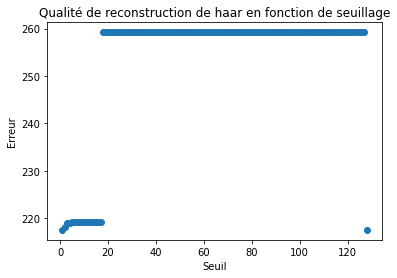

In [406]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(img,haar_2d_inverse(size,seuillage(haar2d,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haar en fonction de seuillage')
plt.xlabel('Seuil')
plt.ylabel('Erreur')
plt.show()

In [ ]:
##Quand le seuil est supérieur à 18, l'erreur est maximale

##### Transformée Quadratique

In [398]:
quad2d = quad_2d_directe(size,img)

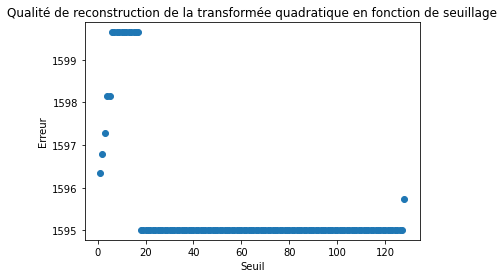

In [407]:
t = ex1(128) ##2**7
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(img,quad_2d_inverse(size,seuillage(quad2d,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de la transformée quadratique en fonction de seuillage')
plt.xlabel('Seuil')
plt.ylabel('Erreur')
plt.show()